In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [3]:
texts = [
    "I love this product",
    "I am extremely satisfied",

    "I hate this product",
    "Not happy at all"
]
labels = [1,1, 0,0,]
data = pd.DataFrame({"Text": texts, "Sentiment": labels})

In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Text"])
y = np.array(labels)

In [5]:
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [6]:
mystery_text = ["The product quality is excellent"]
X_test = vectorizer.transform(mystery_text)

probabilities = model.predict_proba(X_test)
prediction = model.predict(X_test)

print("Mystery Sentence:", mystery_text[0])
print(f"Probability of Negative: {probabilities[0][0]*100:.2f}%")
print(f"Probability of Positive: {probabilities[0][1]*100:.2f}%")
print("Predicted Sentiment:", "Positive" if prediction[0] == 1 else "Negative")

Mystery Sentence: The product quality is excellent
Probability of Negative: 48.57%
Probability of Positive: 51.43%
Predicted Sentiment: Positive


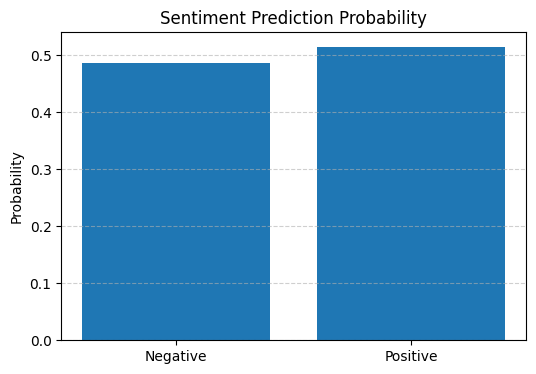

In [7]:
plt.figure(figsize=(6,4))
classes = ["Negative", "Positive"]
plt.bar(classes, probabilities[0])
plt.title("Sentiment Prediction Probability")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


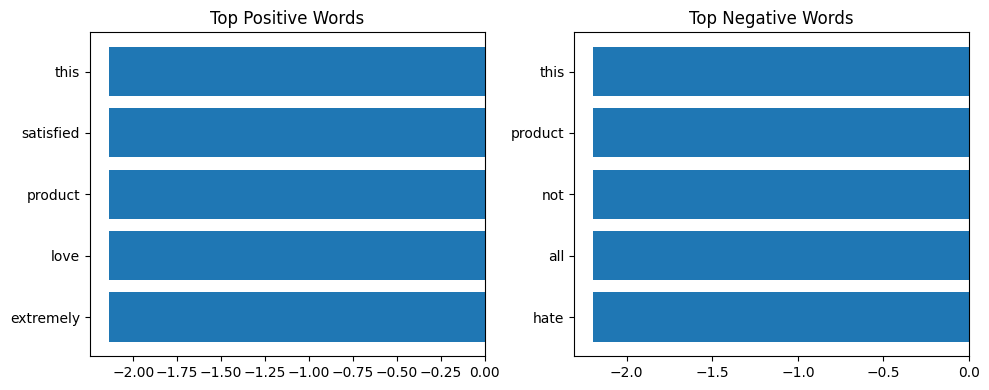

In [8]:
feature_names = np.array(vectorizer.get_feature_names_out())
log_probs = model.feature_log_prob_
top_positive = feature_names[np.argsort(log_probs[1])[-5:]]
top_negative = feature_names[np.argsort(log_probs[0])[-5:]]
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.barh(top_positive, sorted(log_probs[1])[-5:])
plt.title("Top Positive Words")
plt.subplot(1,2,2)
plt.barh(top_negative, sorted(log_probs[0])[-5:])
plt.title("Top Negative Words")
plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [10]:
texts = [
    "I enjoyed this movie",
    "Excellent direction",

    "Bad acting and poor story",
    "Worst movie ever",
    "I did not enjoy this movie"
]

labels = [1,1, 0,0,0]

data = pd.DataFrame({
    "Text": texts,
    "Sentiment": labels
})

In [11]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(data["Text"])
y = np.array(labels)


In [12]:
model = BernoulliNB()
model.fit(X, y)

BernoulliNB()

In [14]:
mystery_text = ["The movie has good acting"]
X_test = vectorizer.transform(mystery_text)
probabilities = model.predict_proba(X_test)
prediction = model.predict(X_test)
print("Mystery Sentence:", mystery_text[0])
print(f"Probability of Negative: {probabilities[0][0]*100:.2f}%")
print(f"Probability of Positive: {probabilities[0][1]*100:.2f}%")
print("Predicted Sentiment:", "Positive" if prediction[0]==1 else "Negative")

Mystery Sentence: The movie has good acting
Probability of Negative: 65.52%
Probability of Positive: 34.48%
Predicted Sentiment: Negative


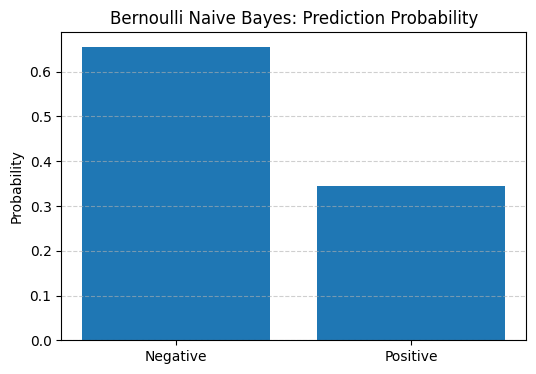

In [15]:
plt.figure(figsize=(6,4))
classes = ["Negative", "Positive"]
plt.bar(classes, probabilities[0])
plt.title("Bernoulli Naive Bayes: Prediction Probability")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

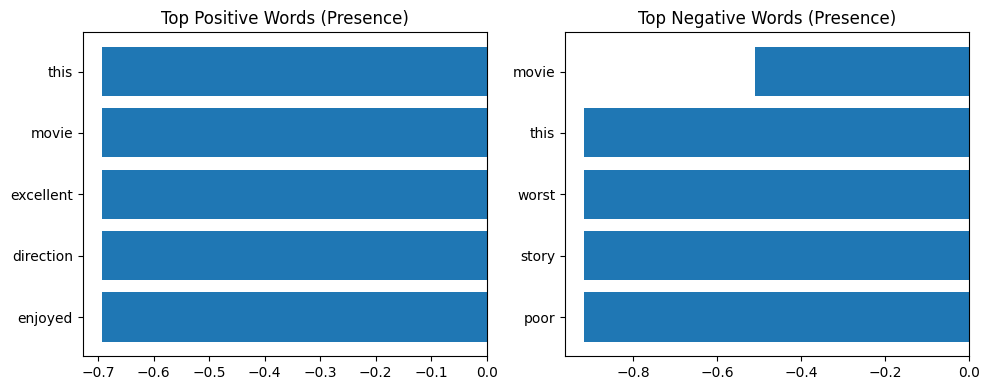

In [16]:
feature_names = np.array(vectorizer.get_feature_names_out())
log_probs = model.feature_log_prob_
top_positive = feature_names[np.argsort(log_probs[1])[-5:]]
top_negative = feature_names[np.argsort(log_probs[0])[-5:]]
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.barh(top_positive, sorted(log_probs[1])[-5:])
plt.title("Top Positive Words (Presence)")
plt.subplot(1,2,2)
plt.barh(top_negative, sorted(log_probs[0])[-5:])
plt.title("Top Negative Words (Presence)")
plt.tight_layout()
plt.show()